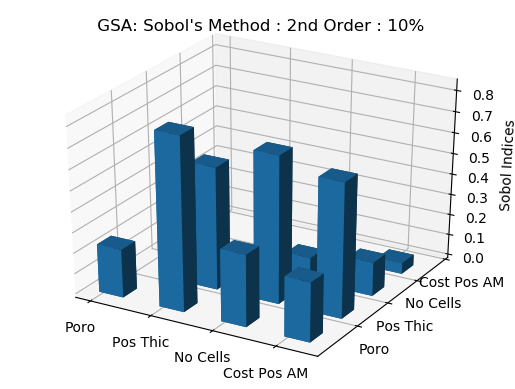

[0.23476674856210356, 0.590873717496667, 0.11743091493760058, 0.05286914349106153][0.8356360066870988, 0.3499432501960715, 0.2900733401148696, 0.71028504202997, 0.6506710969910323, 0.16431901023038772]

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [1]:
 include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)


using DiffEqSensitivity
using PyPlot

per = 10

poro = 0.3
poro_intrvl = [poro*(1 - (per/100)) , poro*(1 + (per/100))]

pos_thic = 150
pos_thic_intrvl = [pos_thic*(1 - (per/100)) , pos_thic*(1 + (per/100))]


no_cells_yr = 10
no_cells_yr_intrvl = [no_cells_yr*(1 - (per/100)) , no_cells_yr*(1 + (per/100))]

cost_pos_AM = 25
cost_pos_AM_intrvl = [cost_pos_AM*(1 - (per/100)) , cost_pos_AM*(1 + (per/100))]


function gsa_cost(arr)

    cell_general.cathode.por        = arr[1]
    cell_general.cathode.th         = converter(arr[2], mult.pos_th)
    cost.general_costs.no_units_mfg = converter(arr[3], mult.units_mfg)
    cost.cell_costs.cathode.AM[1]   = arr[4]

    dollars_kWh = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)[1]

    return dollars_kWh
end

# gsa_cost([0.25, 150.0, 130.0, 25.0, 19.0])

gsa_result = gsa(gsa_cost, Sobol(order = [2]), [poro_intrvl, pos_thic_intrvl, no_cells_yr_intrvl, cost_pos_AM_intrvl], N = 10000)


x = [0, 1, 2, 3, 1, 2, 3, 2, 3, 3]
y = [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]

clf()
print("\n")
S1 = gsa_result.S1
S2 = gsa_result.S2
print(S1)
print(S2)

z = [S1[1], S2[1], S2[2], S2[3], S1[2], S2[4], S2[5], S1[3], S2[6], S1[4]]

r = bar3D(x, y, z*0, 0.4, 0.4, z,)
xticks([0, 1, 2, 3], ["Poro", "Pos Thic", "No Cells", "Cost Pos AM"])
yticks([1, 2, 3, 4], ["Poro", "Pos Thic", "No Cells", "Cost Pos AM"])
title(string(" GSA: Sobol's Method : 2nd Order : ", per, "%"))
zlabel("Sobol Indices")
figure(2)

The above plot are the result of Global Sensitivity Analysis (GSA). Second order GSA assesses the cost by considering one factor and it also considers the coupling effects or interaction effects between the various input parameters.

There is an interaction between the design parameters of the cell and its final cost. The plot above shows this correlation and helps lead to better design decisions.